In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install tensorflow==1.14.0
from keras.utils import to_categorical
from PIL import Image


Using TensorFlow backend.


In [0]:
from keras.models import Sequential,Model
from keras.layers import concatenate,Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm_notebook


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
nfeatureDF = pd.read_csv("drive/My Drive/HandwritingPersonality/NewFinalFeatures.csv")
print("Features Loaded")
nfeatureDF.head()

Features Loaded


,Filename,Baseline,TopMargin,LetterSize,LineSpacing,WordSpacing,PenPressure,SlantAngle,EmotionalStability,WillPower,Modesty,PersonalHarmony,Discipline,Concentration,Communicativeness,SocialIsolation,Slant
0,img5.png,2,0,1,0,0,0,3,1,1,1,0,0,0,1,1,1.0
1,img1501.png,0,0,1,0,0,0,2,0,1,1,0,0,0,1,1,1.0
2,img23d.png,0,0,0,2,0,0,0,0,1,1,0,0,0,0,1,0.0
3,img401.png,1,1,0,1,1,0,2,1,1,0,0,0,1,0,0,1.0
4,img2901.png,1,1,0,0,2,2,2,1,1,0,0,0,0,0,1,1.0


In [0]:
finalData = nfeatureDF[['Filename','Baseline','WordSpacing','Slant']]
finalData.head()

,Filename,Baseline,WordSpacing,Slant
0,img5.png,2,0,1.0
1,img1501.png,0,0,1.0
2,img23d.png,0,0,0.0
3,img401.png,1,1,1.0
4,img2901.png,1,2,1.0


In [0]:
y = finalData.drop('Filename',axis=1)
x = finalData.Filename

output = pd.get_dummies(y,prefix=['B', 'W','S'], columns=['Baseline', 'WordSpacing','Slant'])

output.head()


,B_0,B_1,B_2,W_0,W_1,W_2,S_0.0,S_1.0,S_2.0,S_3.0
0,0,0,1,1,0,0,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,0
3,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0,1,0,0


In [0]:
featureDF = pd.read_csv("drive/My Drive/HandwritingPersonality/NewFeatures.csv")
print("Features Loaded")
featureDF.head()

Features Loaded


,Filename,Baseline,TopMargin,LetterSize,LineSpacing,WordSpacing,PenPressure,SlantAngle
0,img5.png,-0.16,27.00,3.00,153.33,22.56,194.54,30
1,img1501.png,3.38,7.20,8.33,8.88,7.22,191.91,15
2,img23d.png,11.31,4.62,23.60,2.08,2.11,206.39,-30
3,img401.png,-9.54,1.07,71.00,0.46,0.00,182.40,15
4,img2901.png,-1.77,1.19,27.00,4.36,1.98,176.87,15


In [0]:
feature1 = featureDF.drop('Filename',axis=1)
print(np.array(feature1.iloc[0]))
feature1.head()

[-1.6000e-01  2.7000e+01  3.0000e+00  1.5333e+02  2.2560e+01  1.9454e+02
  3.0000e+01]


,Baseline,TopMargin,LetterSize,LineSpacing,WordSpacing,PenPressure,SlantAngle
0,-0.16,27.00,3.00,153.33,22.56,194.54,30
1,3.38,7.20,8.33,8.88,7.22,191.91,15
2,11.31,4.62,23.60,2.08,2.11,206.39,-30
3,-9.54,1.07,71.00,0.46,0.00,182.40,15
4,-1.77,1.19,27.00,4.36,1.98,176.87,15


In [0]:
train_image = []
train_feature = []
for i in tqdm_notebook(range(x.shape[0])):
    img = image.load_img('drive/My Drive/HandwritingPersonality/NEW_DATASET/'+x[i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255.
    feature = np.array(feature1.iloc[i])
    train_image.append(img)
    train_feature.append(feature)
X1 = np.array(train_image)
X2 = np.array(train_feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
y = np.array(output)
y.shape


(63, 10)

In [0]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, random_state=42, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=42, test_size=0.2)


In [0]:
X_train2.shape

(50, 7)

In [0]:
cnnmodel = Sequential()
cnnmodel.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu",input_shape=(400,400,3)))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2, 2)))
cnnmodel.add(Dropout(0.25))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dropout(0.5))
cnnmodel.add(Dense(64, activation='relu'))


mlpmodel = Sequential()
mlpmodel.add(Dense(8, input_dim=X_train2.shape[1], activation="relu"))
mlpmodel.add(Dense(4, activation="relu"))

combinedoutput = concatenate([cnnmodel.output, mlpmodel.output])
combinedoutput = Dense(64, activation="relu")(combinedoutput)
modeloutput = Dense(10, activation='sigmoid')(combinedoutput)



model = Model(inputs=[cnnmodel.input, mlpmodel.input], outputs=modeloutput)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_1_input (InputLayer)     (None, 400, 400, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 396, 396, 16) 1216        conv2d_1_input[0][0]             
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 198, 198, 16) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 198, 198, 16) 0           max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [0]:
history = model.fit([X_train1,X_train2], y_train1, epochs=60, validation_data=([X_test1,X_test2], y_test1), batch_size=8)
model.save('drive/My Drive/HandwritingPersonality/model/CNN_ModelNew.model')

Train on 50 samples, validate on 13 samples
Epoch 1/60
50/50 [==============================] - 8s 167ms/step - loss: 1.6939 - accuracy: 0.6200 - val_loss: 1.3711 - val_accuracy: 0.5615
Epoch 2/60
50/50 [==============================] - 0s 6ms/step - loss: 1.0839 - accuracy: 0.6060 - val_loss: 1.1743 - val_accuracy: 0.5462
Epoch 3/60
50/50 [==============================] - 0s 6ms/step - loss: 0.7942 - accuracy: 0.6780 - val_loss: 0.9675 - val_accuracy: 0.5615
Epoch 4/60
50/50 [==============================] - 0s 6ms/step - loss: 0.6559 - accuracy: 0.7180 - val_loss: 0.8656 - val_accuracy: 0.6308
Epoch 5/60
50/50 [==============================] - 0s 6ms/step - loss: 0.6002 - accuracy: 0.7260 - val_loss: 0.7862 - val_accuracy: 0.6462
Epoch 6/60
50/50 [==============================] - 0s 6ms/step - loss: 0.5406 - accuracy: 0.7300 - val_loss: 0.7277 - val_accuracy: 0.6615
Epoch 7/60
50/50 [==============================] - 0s 6ms/step - loss: 0.4977 - accuracy: 0.7580 - val_loss: 0.67

In [0]:
import json
with open('drive/My Drive/HandwritingPersonality/model/historynew.json', 'w') as f:
    json.dump(str(history.history), f)

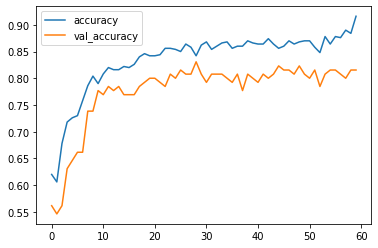

In [0]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

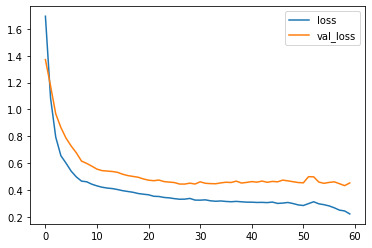

In [0]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()